## Analysis of comments on the whole datatset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re

from lib.function_test import get_nameCategory
from text_analysis_process import sentiment_video

from lib.text_analysis_function import clean_text, detect_lang, pourcentageResult
from lib.text_analysis_function import english_SIA_textAnalysis, french_SIA_textAnalysis
from lib.text_analysis_function import french_TextBlob_textAnalysis, english_TextBlob_textAnalysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/elodieedouard/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/Users/elodieedouard/opt/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Comparison between models 

In [2]:
data_path = './Data/comment_100video2.csv'
data = pd.read_csv(data_path, sep=';')
del data['Unnamed: 0']

In [5]:
data['comment'] = data['comment'].apply(clean_text)

remove_special_char = lambda x: re.sub("[$&+:;=@#|_<>.^*()%-]"," ",x)
data['comment']= data['comment'].apply(remove_special_char)

In [4]:
data['lang'] = list(map(detect_lang, data['comment']))

In [6]:
data['result_SIA'] = [french_SIA_textAnalysis(x) if (y == 'fr') else english_SIA_textAnalysis(x)  for x,y in zip(data['comment'], data['lang'])]

data['result_Textblob'] = [french_TextBlob_textAnalysis(x) if (y == 'fr') else english_TextBlob_textAnalysis(x) for x,y in zip(data['comment'], data['lang'])]

In [7]:
data.head()

,video_id,datePublish,comment,lang,result_SIA,result_Textblob
0,--14w5SOEUs,2021-06-11T23:59:49Z,Giving me Kendrick vibes I fw it fire,en,0,0
1,--14w5SOEUs,2021-06-11T23:59:39Z,Which one is David Ruffin lol,en,1,1
2,--14w5SOEUs,2021-06-11T23:58:54Z,Go awf Takeoff! Yes! fire fire fire,en,-1,0
3,--14w5SOEUs,2021-06-11T23:57:47Z,Take OFF !!,sw,0,0
4,--14w5SOEUs,2021-06-11T23:57:34Z,fire Dominican Republic,ro,-1,0


In [ ]:
#data.to_csv('donnes_com_n_model.csv', sep=';')

In [8]:
pos_SIA, neg_SIA, neu_SIA = pourcentageResult(data['result_SIA'])
pos_Textblob, neg_Textblob, neu_Textblob = pourcentageResult(data['result_Textblob'])

df_3 = pd.DataFrame()
df_3.index = ['SIA', 'Textblob']
df_3['positive'] = [pos_SIA, pos_Textblob]
df_3['negative'] = [neg_SIA, neg_Textblob]
df_3['neutral'] = [neu_SIA, neu_Textblob]

Result for Textblob and SIA models

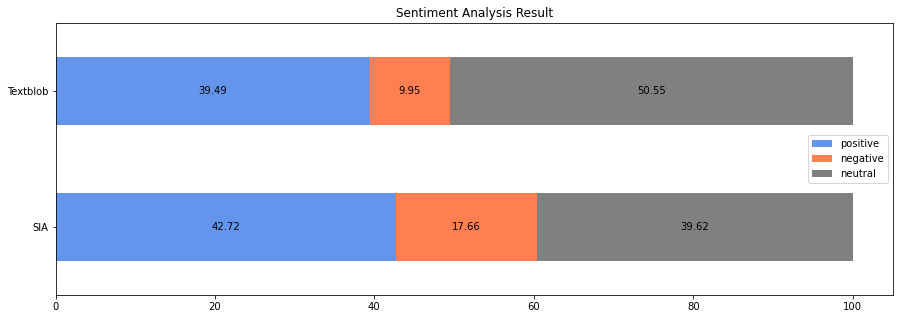

In [9]:
plt.rcParams['figure.figsize'] = [15, 5]

colors = ['cornflowerblue', 'coral','gray']
ax = df_3.plot.barh(stacked=True, color=colors)
plt.bar_label(ax.containers[0], label_type='center')
plt.bar_label(ax.containers[1], label_type='center')
plt.bar_label(ax.containers[2], label_type='center')
plt.title("Sentiment Analysis Result")
plt.show()

### Analysis Process on n comments

In [ ]:
data_path = './Data/full_df_coms.csv'
yt_comment = pd.read_csv(data_path)

In [3]:
num_video = 200
df_result_sentiment = sentiment_video(num_video, yt_comment, "SIA")

In [4]:
df_result_sentiment['categoryId'] = df_result_sentiment['categoryId'].apply(lambda x: get_nameCategory(int(x)))
df_result_sentiment.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,positive,negative,neutral
0,7rlwxSPUcQk,ON EST POSITIF AU COVID-19 (coronavirus),2020-08-11T16:00:31Z,UCpWaR3gNAQGsX48cIlQC0qw,Tibo InShape,Sports,2020-08-12T00:00:00Z,tibo inshape|teamshape|POSITIF AU COVID-19|pos...,1943013,165557,4198,15777,https://i.ytimg.com/vi/7rlwxSPUcQk/default.jpg,False,False,On a fait le test du coronavirus avec @Juju Fi...,43.47,25.53,31.00
1,AcBd_RH9JSw,PASSER UNE NUIT DANS LA PISCINE DE LA VILLA AV...,2020-08-11T10:55:22Z,UCUl7mwOyySfZzUkq4H29nug,LeBouseuh,Entertainment,2020-08-12T00:00:00Z,[None],1823553,346839,2767,8030,https://i.ytimg.com/vi/AcBd_RH9JSw/default.jpg,False,False,Abonne toi à ma chaîne ► http://urlz.fr/4jF2N...,37.73,7.93,54.33
2,JVm8P6kKgD0,FRANGLISH - My Salsa feat. Tory Lanez (clip of...,2020-08-12T10:00:11Z,UCnwfc0O-LGEg8y9bEQTaSgQ,Franglish,Music,2020-08-12T00:00:00Z,franglish|tory lanez|my salsa|c'est plus l'heu...,196340,22362,187,1148,https://i.ytimg.com/vi/JVm8P6kKgD0/default.jpg,False,False,"My Salsa featuring Tory Lanez, extrait du nouv...",42.53,16.00,41.47
3,JfgeD7xWy-w,L’ÉTÉ LE PLUS ECLATÉ DE MA LIFE,2020-08-11T16:00:08Z,UCMj2VQ3-8zpyeAI7dU0T-Bg,Fahd El,Comedy,2020-08-12T00:00:00Z,[None],311609,29561,418,3213,https://i.ytimg.com/vi/JfgeD7xWy-w/default.jpg,False,False,"La famille, n'hésitez pas à vous abonner et à ...",39.13,16.87,44.00
4,P3IkBxra3a8,JE L’ESSAYE ENFIN ! DUCATI HYPERMOTARD,2020-08-12T08:00:05Z,UC-uy7_1hColMpQ_2rs-kY6w,KIKANINAC,Entertainment,2020-08-12T00:00:00Z,ducati|hypermotard|950|rve|essai|test|supermot...,100691,10471,90,384,https://i.ytimg.com/vi/P3IkBxra3a8/default.jpg,False,False,Essai de la Ducati Hypermotard 950 RVE !👕 BOU...,45.86,18.93,35.21


#### Sentiment results by category

In [5]:
df_perCategory = df_result_sentiment.groupby('categoryId')['positive','negative','neutral'].mean()
df_perCategory

/var/folders/56/_q_c1v7j0_1dl5kshds6cyfw0000gn/T/ipykernel_68128/834812435.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_perCategory = df_result_sentiment.groupby('categoryId')['positive','negative','neutral'].mean()


,positive,negative,neutral
categoryId,,,
Autos & Vehicles,51.458333,20.963333,27.581667
Comedy,44.731250,17.790625,37.478125
Education,55.907500,20.222500,23.872500
Entertainment,44.781296,17.821296,37.397407
Film & Animation,45.024000,20.436000,34.538000
Gaming,46.315000,20.722500,32.964167
Howto & Style,55.962000,14.574000,29.463333
Music,39.189750,16.922500,43.886500
News & Politics,35.525000,26.420000,38.055000


Additional information on sentiment result

In [6]:
df_result_sentiment.describe()

,view_count,likes,dislikes,comment_count,positive,negative,neutral
count,2.000000e+02,2.000000e+02,200.00000,200.00000,190.000000,190.000000,190.000000
mean,1.280138e+06,8.994612e+04,3388.05000,7500.70000,45.571895,17.865526,36.562316
std,5.733764e+06,2.816801e+05,27714.36336,32990.60108,12.099771,7.576096,12.431895
min,2.664900e+04,0.000000e+00,0.00000,0.00000,17.200000,0.000000,7.210000
25%,7.506400e+04,5.358750e+03,76.75000,408.00000,36.702500,12.802500,26.570000
50%,1.995325e+05,1.608900e+04,264.50000,1030.50000,45.010000,17.290000,36.810000
75%,8.738995e+05,5.769875e+04,864.00000,3064.50000,52.980000,22.802500,43.530000
max,7.680503e+07,2.820367e+06,382583.00000,335063.00000,80.880000,50.100000,77.930000


Result by category as graph

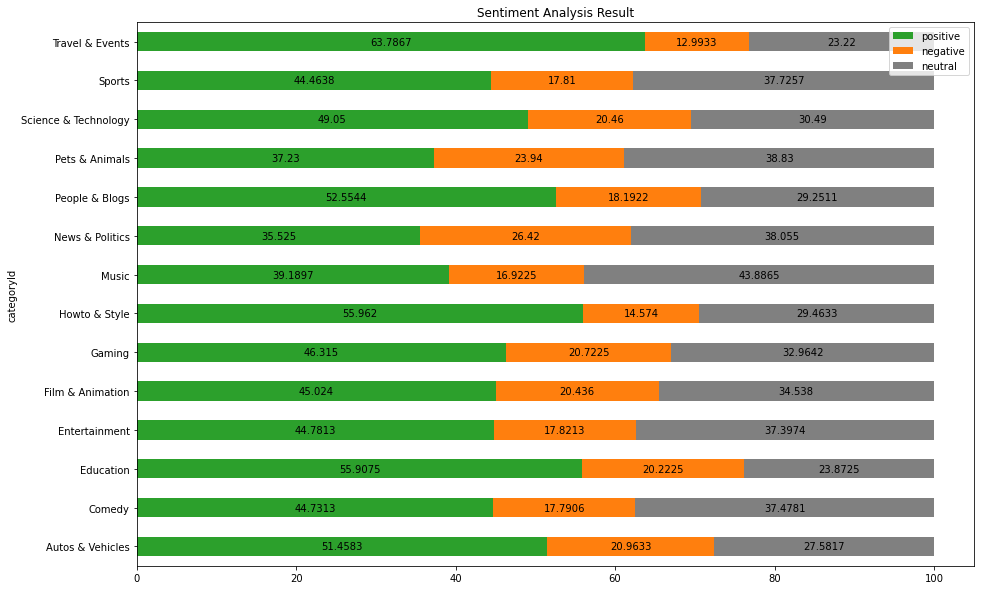

In [9]:
plt.rcParams['figure.figsize'] = [15, 10]

colors = ['tab:green', 'tab:orange','gray']
ax = df_perCategory.plot.barh(stacked=True, color=colors)
plt.bar_label(ax.containers[0], label_type='center')
plt.bar_label(ax.containers[1], label_type='center')
plt.bar_label(ax.containers[2], label_type='center')
plt.title("Sentiment Analysis Result")
plt.show()

In [10]:
df_result_sentiment.to_csv('data_yt_with_sentiment.csv', sep=';')